In [69]:
import numpy as np
import math

# returns a vec of line params
def vec(*args):
    return np.array([*args])



"""
[ a      [ x
  b    *   y    = ax + by + c
  c ]      1 ]

the way on line works
"""
def on_line(l,p):
    return np.dot(
        l, np.append(p, [1])
    ) == 0

def vec_len(v):
    dim = [x**2 for x in v[:]]
    return sum(dim)**0.5

'''
(p + n*t) * n + c = 0
n*t*n = -(c + p*n)
t = -(c + p*n) / (|n|^2)
'''

def pldist(l,p):
    c = l[-1]
    n = l[0:-1]
    t = -(c + np.dot(p,n)) / np.dot(n,n)
    return np.abs(t * vec_len(n))

pldist(
    vec(1,3,5,4),
    vec(4,0,0)
)

1.3522468075656264

$ p \in \{p \in \mathbb{R^2} \ | \ n*p + c = 0\} $

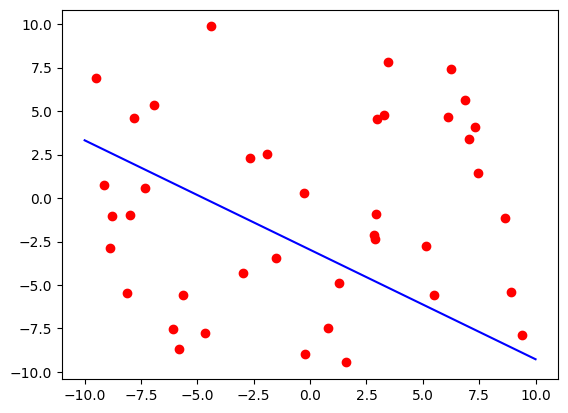

In [103]:
import torch
from torch import Tensor
from torch.optim import SGD
from matplotlib import pyplot as plt

def tvec(*args):
    return torch.tensor([*args])


def vec_len(v):
    dim = [x**2 for x in v[:]]
    return sum(dim)**0.5


def pldist(l, p):
    c = l[-1]
    n = l[0:-1]
    t = -(c + torch.dot(p, n)) / torch.dot(n, n)
    return torch.abs(t * vec_len(n))


def pltpoints(p):
    plt.plot([x[0] for x in p], [x[1] for x in p], 'ro')

def pltline(l):
    l = l.detach().numpy()
    x = np.linspace(-10, 10, 1000)
    y = (-l[0] * x - l[2]) / l[1]
    plt.plot(x, y, '-b')


l = torch.rand(3, requires_grad=True)


points = [torch.rand(2)*20 - 10 for _ in range(40)]


pltpoints(points)
pltline(l)

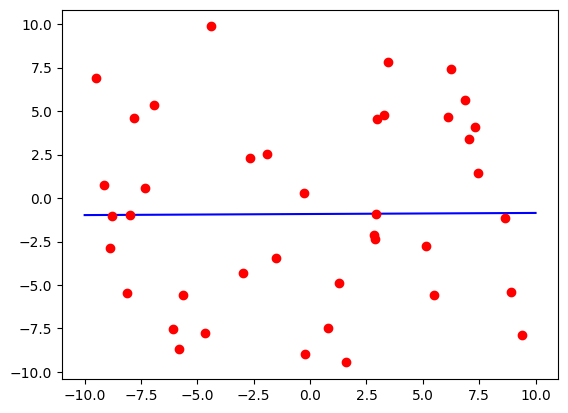

In [104]:
optimizer = SGD([l], lr=0.01)
for _ in range(1000):
    for p in points:
        optimizer.zero_grad()
        distance = pldist(l, p)
        distance.backward()
        optimizer.step()

pltline(l)
pltpoints(points)